# Kickstarter

In [1]:
import os
from pathlib import Path
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd    
import seaborn as sns


pd.options.display.max_columns = 100
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
!ls 

01-md5.ipynb           02-md5.ipynb           ks-projects-201801.csv


In [4]:
# pathlib or os.path: pick one
INPUT_PATH = Path('')
DF_PATH = os.path.join(INPUT_PATH, "ks-projects-201801.csv")
DF_PATH

'./ks-projects-201801.csv'

In [5]:
!head ks-projects-201801.csv # only on UNIX

In [6]:
df_raw = pd.read_csv(DF_PATH, index_col='ID', parse_dates=['launched', 'deadline'])
df_raw.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [7]:
df_raw.describe()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 14 columns):
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null datetime64[ns]
goal                378661 non-null float64
launched            378661 non-null datetime64[ns]
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(1), object(6)
memory usage: 43.3+ MB


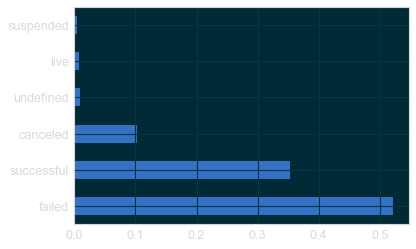

In [9]:
df_raw['state'].value_counts(normalize=True).plot(kind="barh");

# Preprocessing

In [10]:
df = df_raw.copy(deep=True)

## Categorical encoding

In [11]:
for c in df_raw.select_dtypes('object').columns:
    if c == 'state':
        continue
    df[c] = df_raw[c].astype('category').cat.codes

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 14 columns):
name                378661 non-null int32
category            378661 non-null int16
main_category       378661 non-null int8
currency            378661 non-null int8
deadline            378661 non-null datetime64[ns]
goal                378661 non-null float64
launched            378661 non-null datetime64[ns]
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null int8
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: datetime64[ns](2), float64(5), int16(1), int32(1), int64(1), int8(3), object(1)
memory usage: 32.1+ MB


## Missing values

In [12]:
df_non_zero_backers = df_raw.loc[df_raw['backers'] != 0]
df_non_zero_backers.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.0
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.0
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.0
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.0


In [13]:
average_pledged_account = np.mean(
    df_non_zero_backers['usd_pledged_real'] / df_non_zero_backers['backers'])
average_pledged_account

75.69746482952095

### Missing backers imputation
We have some missing values in the backers columns (0 backers but pledged > 0). We will impute them.

In [14]:
def impute_backers(row):
    return int(round(row['usd_pledged_real'] / average_pledged_account))

In [15]:
wrong_indexes = df.loc[(df['backers'] == 0) & (df['usd_pledged_real'] > 0)].index
wrong_indexes

Int64Index([1000694855,  100149523, 1003023003, 1003130892, 1003629045,
            1004013077, 1004126342, 1004255433, 1004298993, 1004402863,
            ...
             994933706,   99613274,   99739483,  997554968,  997793413,
             997915422,  997971307,  998319149,    9988744,  999610349],
           dtype='int64', name='ID', length=3082)

In [16]:
df.loc[df['backers'] == 0, 'backers'] = df.loc[df['backers'] == 0].apply(impute_backers, axis=1)
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,326290,108,12,5,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,9,0.0,0.0,1533.95
1000003930,132984,93,6,13,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,22,100.0,2421.0,30000.00
1000004038,357882,93,6,13,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,22,220.0,220.0,45000.00
1000007540,338194,90,10,13,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,22,1.0,1.0,5000.00
1000011046,76586,55,6,13,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,22,1283.0,1283.0,19500.00


In [17]:
df.loc[wrong_indexes].head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000694855,260860,55,6,13,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,7,16,NaN,555.00,6500.00
100149523,98472,90,10,0,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,45,16,NaN,3402.08,3211.53
1003023003,317133,90,10,13,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,47,16,NaN,3576.00,3500.00
1003130892,60954,90,10,13,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,93,16,NaN,7007.80,6000.00
1003629045,69589,90,10,13,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,48,16,NaN,3660.38,3000.00


In [18]:
df.loc[df['backers'] == 0, 'backers'] = (df.loc[
    df['backers'] == 0, 'usd_pledged_real'] / average_pledged_account)

In [19]:
df.head(15)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,326290,108,12,5,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0.0,9,0.00,0.00,1533.95
1000003930,132984,93,6,13,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15.0,22,100.00,2421.00,30000.00
1000004038,357882,93,6,13,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3.0,22,220.00,220.00,45000.00
1000007540,338194,90,10,13,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1.0,22,1.00,1.00,5000.00
1000011046,76586,55,6,13,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14.0,22,1283.00,1283.00,19500.00
1000014025,201812,123,7,13,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224.0,22,52375.00,52375.00,50000.00
1000023410,287015,58,7,13,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16.0,22,1205.00,1205.00,1000.00
1000030581,69619,41,7,13,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40.0,22,453.00,453.00,25000.00
1000034518,260057,113,4,13,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58.0,22,8233.00,8233.00,125000.00


# Train test split
We use a train test split to validate our results.

In [20]:
NUM_FEATURES = ['backers', 'usd_pledged_real', 'usd_goal_real']
CAT_FEATURES = ['main_category', 'currency', 'country']

X = df[NUM_FEATURES + CAT_FEATURES]
X.head()

,backers,usd_pledged_real,usd_goal_real,main_category,currency,country
ID,,,,,,
1000002330,0.0,0.0,1533.95,12,5,9
1000003930,15.0,2421.0,30000.00,6,13,22
1000004038,3.0,220.0,45000.00,6,13,22
1000007540,1.0,1.0,5000.00,10,13,22
1000011046,14.0,1283.0,19500.00,6,13,22


In [21]:
y = df['state']
y.head()

ID
1000002330      failed
1000003930      failed
1000004038      failed
1000007540      failed
1000011046    canceled
Name: state, dtype: object

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((283995, 6), (283995,), (94666, 6), (94666,))

# Modeling

In [24]:
def train_model(model, X, y,):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    return {
        'train accuracy': train_acc,
        'test accuracy': test_acc
    }

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf = RandomForestClassifier()
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_train, rf.predict(X_train))

0.9618303139139773

In [30]:
accuracy_score(y_test, rf.predict(X_test))

0.8574567426531172

# Feature engineering

## Feature extraction

In [31]:
def extract_date_features(df, col):
    X = pd.DataFrame()
    """ Extract features from a date. """
    X[col + '_year'] = df[col].dt.year
    X[col + '_month'] = df[col].dt.month
    X[col + '_week'] = df[col].dt.week
    X[col + '_dow'] = df[col].dt.dayofweek
    X[col + '_hour'] = df[col].dt.hour
    X[col + '_weekday'] = df[col].dt.weekday
    X[col + '_days_in_month'] = df[col].dt.days_in_month
    X[col + '_is_month_start'] = df[col].dt.is_month_start
    X[col + '_is_month_end'] = df[col].dt.is_month_end
    return X

In [32]:
launched_features = extract_date_features(df, 'launched')
launched_features.head()

,launched_year,launched_month,launched_week,launched_dow,launched_hour,launched_weekday,launched_days_in_month,launched_is_month_start,launched_is_month_end
ID,,,,,,,,,
1000002330,2015,8,33,1,12,1,31,False,False
1000003930,2017,9,35,5,4,5,30,False,False
1000004038,2013,1,2,5,0,5,31,False,False
1000007540,2012,3,11,5,3,5,31,False,False
1000011046,2015,7,27,5,8,5,31,False,False


In [33]:
X = pd.concat([X, launched_features], axis=1)
X.head()

,backers,usd_pledged_real,usd_goal_real,main_category,currency,country,launched_year,launched_month,launched_week,launched_dow,launched_hour,launched_weekday,launched_days_in_month,launched_is_month_start,launched_is_month_end
ID,,,,,,,,,,,,,,,
1000002330,0.0,0.0,1533.95,12,5,9,2015,8,33,1,12,1,31,False,False
1000003930,15.0,2421.0,30000.00,6,13,22,2017,9,35,5,4,5,30,False,False
1000004038,3.0,220.0,45000.00,6,13,22,2013,1,2,5,0,5,31,False,False
1000007540,1.0,1.0,5000.00,10,13,22,2012,3,11,5,3,5,31,False,False
1000011046,14.0,1283.0,19500.00,6,13,22,2015,7,27,5,8,5,31,False,False


In [34]:
X = pd.concat([X, extract_date_features(df, 'deadline')], axis=1)
X.shape

(378661, 24)

In [35]:
X.head()

,backers,usd_pledged_real,usd_goal_real,main_category,currency,country,launched_year,launched_month,launched_week,launched_dow,launched_hour,launched_weekday,launched_days_in_month,launched_is_month_start,launched_is_month_end,deadline_year,deadline_month,deadline_week,deadline_dow,deadline_hour,deadline_weekday,deadline_days_in_month,deadline_is_month_start,deadline_is_month_end
ID,,,,,,,,,,,,,,,,,,,,,,,,
1000002330,0.0,0.0,1533.95,12,5,9,2015,8,33,1,12,1,31,False,False,2015,10,41,4,0,4,31,False,False
1000003930,15.0,2421.0,30000.00,6,13,22,2017,9,35,5,4,5,30,False,False,2017,11,44,2,0,2,30,True,False
1000004038,3.0,220.0,45000.00,6,13,22,2013,1,2,5,0,5,31,False,False,2013,2,9,1,0,1,28,False,False
1000007540,1.0,1.0,5000.00,10,13,22,2012,3,11,5,3,5,31,False,False,2012,4,16,0,0,0,30,False,False
1000011046,14.0,1283.0,19500.00,6,13,22,2015,7,27,5,8,5,31,False,False,2015,8,35,5,0,5,31,False,False


In [36]:
def average_pledge(row):
    res = 0
    if row['usd_pledged_real'] > 0 and row['backers'] > 0:
        res = row['usd_pledged_real'] / row['backers']
    return res

X.loc[:, 'average_pledge'] = df.apply(average_pledge, axis='columns')
X.head()

,backers,usd_pledged_real,usd_goal_real,main_category,currency,country,launched_year,launched_month,launched_week,launched_dow,launched_hour,launched_weekday,launched_days_in_month,launched_is_month_start,launched_is_month_end,deadline_year,deadline_month,deadline_week,deadline_dow,deadline_hour,deadline_weekday,deadline_days_in_month,deadline_is_month_start,deadline_is_month_end,average_pledge
ID,,,,,,,,,,,,,,,,,,,,,,,,,
1000002330,0.0,0.0,1533.95,12,5,9,2015,8,33,1,12,1,31,False,False,2015,10,41,4,0,4,31,False,False,0.000000
1000003930,15.0,2421.0,30000.00,6,13,22,2017,9,35,5,4,5,30,False,False,2017,11,44,2,0,2,30,True,False,161.400000
1000004038,3.0,220.0,45000.00,6,13,22,2013,1,2,5,0,5,31,False,False,2013,2,9,1,0,1,28,False,False,73.333333
1000007540,1.0,1.0,5000.00,10,13,22,2012,3,11,5,3,5,31,False,False,2012,4,16,0,0,0,30,False,False,1.000000
1000011046,14.0,1283.0,19500.00,6,13,22,2015,7,27,5,8,5,31,False,False,2015,8,35,5,0,5,31,False,False,91.642857


In [37]:
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,326290,108,12,5,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0.0,9,0.0,0.0,1533.95
1000003930,132984,93,6,13,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15.0,22,100.0,2421.0,30000.00
1000004038,357882,93,6,13,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3.0,22,220.0,220.0,45000.00
1000007540,338194,90,10,13,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1.0,22,1.0,1.0,5000.00
1000011046,76586,55,6,13,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14.0,22,1283.0,1283.0,19500.00


In [38]:
df.loc[(df['backers'] == 0) & (df['usd_pledged_real'] > 0)]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,


In [39]:
X.head()

,backers,usd_pledged_real,usd_goal_real,main_category,currency,country,launched_year,launched_month,launched_week,launched_dow,launched_hour,launched_weekday,launched_days_in_month,launched_is_month_start,launched_is_month_end,deadline_year,deadline_month,deadline_week,deadline_dow,deadline_hour,deadline_weekday,deadline_days_in_month,deadline_is_month_start,deadline_is_month_end,average_pledge
ID,,,,,,,,,,,,,,,,,,,,,,,,,
1000002330,0.0,0.0,1533.95,12,5,9,2015,8,33,1,12,1,31,False,False,2015,10,41,4,0,4,31,False,False,0.000000
1000003930,15.0,2421.0,30000.00,6,13,22,2017,9,35,5,4,5,30,False,False,2017,11,44,2,0,2,30,True,False,161.400000
1000004038,3.0,220.0,45000.00,6,13,22,2013,1,2,5,0,5,31,False,False,2013,2,9,1,0,1,28,False,False,73.333333
1000007540,1.0,1.0,5000.00,10,13,22,2012,3,11,5,3,5,31,False,False,2012,4,16,0,0,0,30,False,False,1.000000
1000011046,14.0,1283.0,19500.00,6,13,22,2015,7,27,5,8,5,31,False,False,2015,8,35,5,0,5,31,False,False,91.642857


In [40]:
%%time

train_model(rf, X, y)

CPU times: user 8.85 s, sys: 211 ms, total: 9.07 s
Wall time: 9.08 s


{'train accuracy': 0.9939611612880509, 'test accuracy': 0.871970929372742}

# Fit after feature engineering

In [41]:
train_model(rf, X, y)

{'train accuracy': 0.9940456698181306, 'test accuracy': 0.8721188177381531}

# Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dt = DecisionTreeClassifier(max_depth=2, min_samples_split=20)
train_model(dt, X, y)

{'train accuracy': 0.7371960773957288, 'test accuracy': 0.737138993936577}

In [44]:
from nibble.tree import print_tree, display_tree

ModuleNotFoundError: No module named 'nibble'

In [ ]:
print_tree(dt)

In [ ]:
from IPython.display import Image
Image(display_tree(dt))

In [ ]:
n_estimators = 10
rf = RandomForestClassifier(n_estimators=n_estimators, oob_score=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [ ]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_acc:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

In [ ]:
rf.oob_score_

In [ ]:
preds = np.stack([t.predict(X_test) for t in rf.estimators_]).T
preds.shape

In [ ]:
import scipy

In [ ]:
mode_, count_ = scipy.stats.mode(preds[0, :])
mode_, count_

In [ ]:
modes_, counts_ = scipy.stats.mode(preds, axis=1)
confidence = pd.DataFrame({
    'pred': np.squeeze(modes_),
    'freq': np.squeeze(counts_) / n_estimators * 100
})
confidence.head()

In [ ]:
rf.classes_

In [ ]:
confidence['pred'] = confidence['pred'].apply(lambda p: rf.classes_[int(p)])
confidence.head()

In [ ]:
pvt = pd.pivot_table(confidence, values='freq', columns='pred', aggfunc=['mean', 'std'])
pvt

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
LABELS = y_train.unique()
LABELS

In [ ]:
cm = confusion_matrix(y_test, y_test_pred, labels=LABELS)
cm

In [ ]:
pd.DataFrame(cm, columns=LABELS, index=LABELS)

In [ ]:
ax = plt.gca()

sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(LABELS, rotation=45)
ax.yaxis.set_ticklabels(LABELS, rotation=0);

## Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1)
cv_scores

In [ ]:
np.mean(cv_scores), np.std(cv_scores)

### `StratifiedKFold`

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf

In [ ]:
cv_scores = cross_val_score(rf, X_train, y_train, cv=skf, n_jobs=-1)
cv_scores

## Tuning hyperparameters

In [ ]:
rf = RandomForestClassifier(n_estimators=20)

In [ ]:
cv_scores = cross_val_score(rf, X_train, y_train, cv=skf, n_jobs=-1)
cv_scores

## Features importance

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
rf.feature_importances_

In [ ]:
fi_dict = {
    'feats': X_train.columns,
    'feature_importance': rf.feature_importances_
}
fi = pd.DataFrame(fi_dict).set_index('feats').sort_values(
    'feature_importance', ascending=False)
fi.head(10)

In [ ]:
fi.sort_values(
    'feature_importance', ascending=True).tail(10).plot.barh();

In [ ]:
X['currency']